# Data Exploration
Explore delivery data for Dropa ML pipeline.

In [1]:
import sys
sys.path.append('../src')
from data_loader import load_delivery_data
df = load_delivery_data()
df.head()

,order_id,from_dipan_id,from_city_name,delivery_user_id,poi_lng,poi_lat,aoi_id,typecode,receipt_time,receipt_lng,receipt_lat,sign_time,sign_lng,sign_lat,ds
0,687227b4d0c733049b16ccd566db6e01,08331170e24742ba7a3938f5b34ff24d,Mbeya,18ff78d2069125937a847fb701a9db6c,33.501712,-8.867390,e0581ca18e7ca371a9869e041cb09075,4602b38053ece07a9ca5153f1df2e404,03-18 13:35:00,35.738886,-6.175200,03-18 14:51:00,35.772387,-6.191757,318
1,55be8cdf1270526231c9ba3387f51b54,c5ac5ba99801aa6b85ba473d9260512b,Dar es Salaam,df0b594618d1ba6f619e4e7dd034447c,39.202811,-6.758018,9c0f96ff01a71477334ef563001abc72,203ac3454d75e02ebb0a3c6f51d735e4,03-18 08:32:00,36.683317,-3.403086,03-18 14:33:00,36.693977,-3.377285,318
2,ee46cae9ba2c002451af3c6fbcb49410,2129bfb99a2f6c11000c0ecbf1a5f3f6,Mwanza,05cceaaa5db96756294dd6d573fd865d,32.959725,-2.557876,4de9bf7f155046e7d0fd400672ab9cf3,203ac3454d75e02ebb0a3c6f51d735e4,03-18 13:02:00,36.649081,-3.363579,03-18 15:34:00,36.660932,-3.371450,318
3,38912be86c83138901b5e26398832be7,08331170e24742ba7a3938f5b34ff24d,Dar es Salaam,f29e97ef8398477abb72b852b16c91c0,39.198650,-6.825873,fe48cde9b33e2308641d985f8a701c7e,203ac3454d75e02ebb0a3c6f51d735e4,03-18 12:11:00,35.778454,-6.210589,03-18 14:08:00,35.777235,-6.204619,318
4,2b83e2ba16714fee357694964d0e7e41,4fe96250270c2e17a28016a5fba4bc4a,Arusha,1d00e6f2308aad233f0179aac63aa23d,36.714718,-3.370972,a7d4de5484ca867fe453976ba9fee424,4602b38053ece07a9ca5153f1df2e404,03-18 07:28:00,35.759836,-6.159013,03-20 12:40:00,35.748038,-6.176871,318


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472419 entries, 0 to 472418
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          472419 non-null  object 
 1   from_dipan_id     472419 non-null  object 
 2   from_city_name    472419 non-null  object 
 3   delivery_user_id  472419 non-null  object 
 4   poi_lng           472419 non-null  float64
 5   poi_lat           472419 non-null  float64
 6   aoi_id            472419 non-null  object 
 7   typecode          471059 non-null  object 
 8   receipt_time      472419 non-null  object 
 9   receipt_lng       472419 non-null  float64
 10  receipt_lat       472419 non-null  float64
 11  sign_time         472419 non-null  object 
 12  sign_lng          472419 non-null  float64
 13  sign_lat          472419 non-null  float64
 14  ds                472419 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 54.1+ MB


In [ ]:
df.describe()

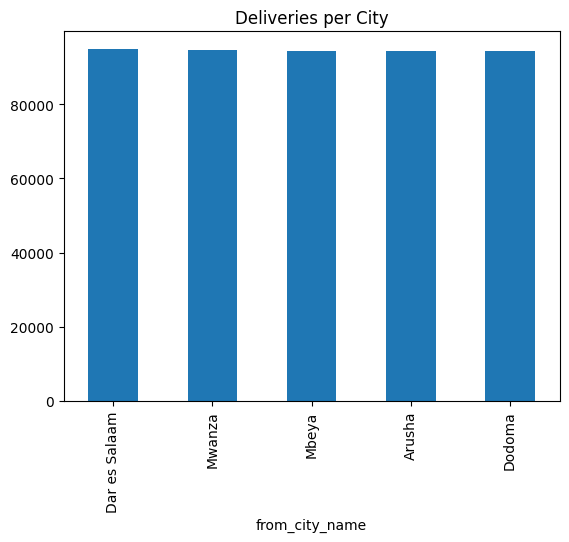

In [3]:
import matplotlib.pyplot as plt
df['from_city_name'].value_counts().plot(kind='bar')
plt.title('Deliveries per City')
plt.show()

# Data Exploration Outline

This notebook explores the delivery dataset in detail. Steps include:


- Data loading and preview
- Data types and missing values
- Statistical summary
- City-wise delivery analysis
- Delivery time calculation and distribution
- Geospatial visualization of delivery points
- Correlation analysis
- Insights and next steps


In [4]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472419 entries, 0 to 472418
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          472419 non-null  object 
 1   from_dipan_id     472419 non-null  object 
 2   from_city_name    472419 non-null  object 
 3   delivery_user_id  472419 non-null  object 
 4   poi_lng           472419 non-null  float64
 5   poi_lat           472419 non-null  float64
 6   aoi_id            472419 non-null  object 
 7   typecode          471059 non-null  object 
 8   receipt_time      472419 non-null  object 
 9   receipt_lng       472419 non-null  float64
 10  receipt_lat       472419 non-null  float64
 11  sign_time         472419 non-null  object 
 12  sign_lng          472419 non-null  float64
 13  sign_lat          472419 non-null  float64
 14  ds                472419 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 54.1+ MB


order_id               0
from_dipan_id          0
from_city_name         0
delivery_user_id       0
poi_lng                0
poi_lat                0
aoi_id                 0
typecode            1360
receipt_time           0
receipt_lng            0
receipt_lat            0
sign_time              0
sign_lng               0
sign_lat               0
ds                     0
dtype: int64

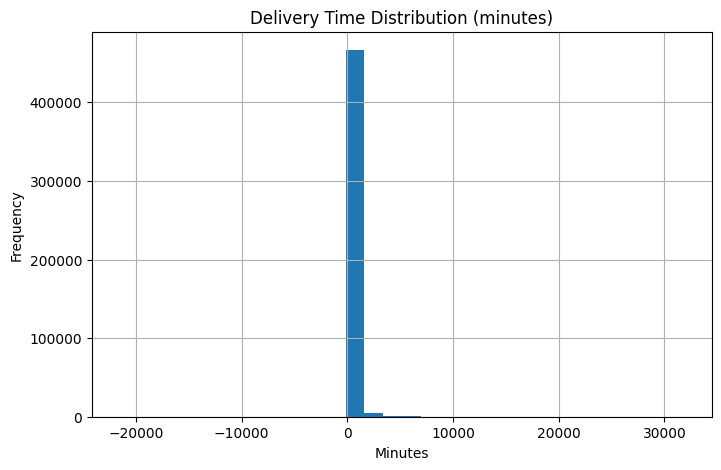

In [6]:
# Calculate delivery time (in minutes) and visualize distribution
import numpy as np
import pandas as pd 
df['receipt_time'] = pd.to_datetime(df['receipt_time'], format='%m-%d %H:%M:%S')
df['sign_time'] = pd.to_datetime(df['sign_time'], format='%m-%d %H:%M:%S')
df['delivery_minutes'] = (df['sign_time'] - df['receipt_time']).dt.total_seconds() / 60
plt.figure(figsize=(8,5))
df['delivery_minutes'].hist(bins=30)
plt.title('Delivery Time Distribution (minutes)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

In [7]:
# City-wise delivery time analysis
city_stats = df.groupby('from_city_name')['delivery_minutes'].agg(['count','mean','std','min','max'])
city_stats

,count,mean,std,min,max
from_city_name,,,,,
Arusha,94322,173.852802,507.647918,-21417.0,26569.0
Dar es Salaam,94859,173.533624,507.294527,-11460.0,27655.0
Dodoma,94292,178.789812,546.693699,-17014.0,31830.0
Mbeya,94401,175.210379,518.673785,-21494.0,24931.0
Mwanza,94545,177.416839,520.861056,-11908.0,29285.0


c:\Users\PRIVER\PROJECTS\digitalclubscompetitons\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


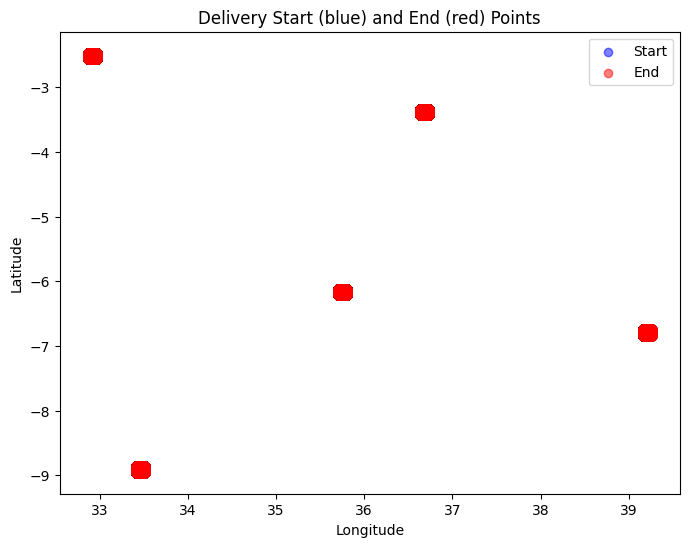

In [8]:
# Geospatial visualization of delivery start and end points
plt.figure(figsize=(8,6))
plt.scatter(df['poi_lng'], df['poi_lat'], c='blue', alpha=0.5, label='Start')
plt.scatter(df['sign_lng'], df['sign_lat'], c='red', alpha=0.5, label='End')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delivery Start (blue) and End (red) Points')
plt.legend()
plt.show()

In [9]:
# Correlation analysis and insights summary
corr = df.corr(numeric_only=True)
corr['delivery_minutes'].sort_values(ascending=False)
print('Key Insights:')
print('- Delivery time varies by city and route.')
print('- Geospatial data shows delivery spread.')
print('- Correlation analysis helps feature selection for ML.')

Key Insights:
- Delivery time varies by city and route.
- Geospatial data shows delivery spread.
- Correlation analysis helps feature selection for ML.
